In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Đọc dữ liệu từ các tệp Excel
VN2018 = pd.read_excel("2018-Vietnam (1).xlsx")
VN2019 = pd.read_excel("2019-Vietnam (1).xlsx")
VN2020 = pd.read_excel("2020-Vietnam (1).xlsx")
VN2021 = pd.read_excel("2021-Vietnam (1).xlsx")
VN2022 = pd.read_excel("2022-Vietnam (1).xlsx")
# Nối dữ liệu
inf = pd.concat([VN2018, VN2019, VN2020, VN2021, VN2022], ignore_index=True)

# Tiền xử lý dữ liệu
inf = inf.iloc[7:].reset_index(drop=True)
inf.columns = inf.iloc[0]
inf = inf[1:]
inf.reset_index(drop=True, inplace=True)
inf = pd.DataFrame(inf)
# Danh sách các cột không muốn thay đổi
excluded_columns = ["STT", "Mã", "Tên công ty", "Sàn", "Ngành ICB - cấp 1", "Ngành ICB - cấp 2", "Ngành ICB - cấp 3", "Ngành ICB - cấp 4"]

# Kiểm tra và loại bỏ khoảng trắng từ tên cột (ngoại trừ các cột được liệt kê trong excluded_columns)
inf.columns = inf.columns.where(inf.columns.isin(excluded_columns), inf.columns.str.extract(r'\s*([^\n]+)\n', expand=False))

inf.index.name = "Năm"

inf

,STT,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,...,TM. Chi phí tài chính khác,TM. Chi phí sản xuất theo yếu tố,"TM. Chi phí nguyên liệu, vật liệu",TM. Chi phí nhân công,TM.Chi phí khấu hao tài sản cố định,TM. Chi phí dịch vụ mua ngoài,TM. Chi phí khác bằng tiền,BCTCKH. Doanh thu kế hoạch,BCTCKH. Tổng lợi nhuận kế toán trước thuế,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp
Năm,,,,,,,,,,,,,,,,,,,,,
0,1,ACB,ACB,HOSE,Ngân hàng,Ngân hàng,Ngân hàng,Ngân hàng,5,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7279000000000,5823200000000
1,2,BCM,Becamex IDC,HOSE,Tài chính,Bất động sản,Bất động sản,Bất động sản,5,2018,...,3543121946,9062957842701,1451720418454,1039031680467,223031443148,5870329556428,478844744204,8998000000000,2897000000000,2613000000000
2,3,BID,BIDV,HOSE,Ngân hàng,Ngân hàng,Ngân hàng,Ngân hàng,5,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,10300000000000,8240000000000
3,4,BVH,Tập đoàn Bảo Việt,HOSE,Tài chính,Bảo hiểm,Bảo hiểm nhân thọ,Bảo hiểm nhân thọ,5,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1544000000000,1350000000000,1080000000000
4,5,CTG,VietinBank,HOSE,Ngân hàng,Ngân hàng,Ngân hàng,Ngân hàng,5,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,9500000000000,7600000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,1660,XMD,Xuân Mai - Đạo Tú,UPCoM,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,5,2022,...,0,138253205514,105401288692,20349396860,3040011597,7425861340,2036647025,140000000000,4023000000,4023000000
8348,1661,XMP,Thủy điện Xuân Minh,UPCoM,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Sản xuất & Phân phối Điện,Sản xuất & Phân phối Điện,5,2022,...,0,34799335446,602422769,7121650665,19377000649,6952392866,745868497,78773000000,13673000000,12758000000
8349,1662,XPH,Xà phòng Hà Nội,UPCoM,Hàng Tiêu dùng,Hàng cá nhân & Gia dụng,Hàng cá nhân,Hàng cá nhân,5,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96028000000,-6187000000,-6187000000


In [ ]:
# Xử lý giá trị NaN
inf = inf.dropna()
inf

,STT,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,...,TM. Chi phí tài chính khác,TM. Chi phí sản xuất theo yếu tố,"TM. Chi phí nguyên liệu, vật liệu",TM. Chi phí nhân công,TM.Chi phí khấu hao tài sản cố định,TM. Chi phí dịch vụ mua ngoài,TM. Chi phí khác bằng tiền,BCTCKH. Doanh thu kế hoạch,BCTCKH. Tổng lợi nhuận kế toán trước thuế,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp
Năm,,,,,,,,,,,,,,,,,,,,,
1,2,BCM,Becamex IDC,HOSE,Tài chính,Bất động sản,Bất động sản,Bất động sản,5,2018,...,3543121946,9062957842701,1451720418454,1039031680467,223031443148,5870329556428,478844744204,8998000000000,2897000000000,2613000000000
5,6,FPT,FPT Corp,HOSE,Công nghệ Thông tin,Công nghệ Thông tin,Phần mềm & Dịch vụ Máy tính,Phần mềm,5,2018,...,10948936512,20176807407326,3565645393709,7707908345504,1872663628552,5700557333979,1330032705582,26660000000000,4460000000000,3568000000000
6,7,GAS,PV Gas,HOSE,Tiện ích Cộng đồng,"Điện, nước & xăng dầu khí đốt",Nước & Khí đốt,Phân phối xăng dầu & khí đốt,5,2018,...,10091078363,61877448110495,52491143160001,1327486216008,2828502305719,3951895737798,1278420690969,63908000000000,9546000000000,7643000000000
7,8,GVR,Tập đoàn CN Cao su VN,HOSE,Nguyên vật liệu,Hóa chất,Hóa chất,"Nhựa, cao su & sợi",5,2018,...,63887590591,0,0,0,0,0,0,24224000000000,5187500000000,4150000000000
9,10,HPG,Hòa Phát,HOSE,Nguyên vật liệu,Tài nguyên Cơ bản,Kim loại,Thép và sản phẩm thép,5,2018,...,16476345182,46701963367260,36585746491178,1584989943790,2259594298268,2639853534460,3631779099564,70000000000000,8375000000000,6700000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8345,1658,XLV,XL và DV Sông Đà,UPCoM,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Xây dựng,5,2022,...,0,294033005132,99505172533,59932651810,1514636312,128314960157,4765584320,281818182000,5000000000,4000000000
8346,1659,XMC,Bê tông Xuân Mai,UPCoM,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,5,2022,...,0,1938574580316,447648087893,232116235924,64281339949,1135481953301,59046963249,2836926000000,104959000000,77582000000
8347,1660,XMD,Xuân Mai - Đạo Tú,UPCoM,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,5,2022,...,0,138253205514,105401288692,20349396860,3040011597,7425861340,2036647025,140000000000,4023000000,4023000000


In [ ]:
import pandas as pd

# Giả sử bạn đã có dataframe inf

# Đặt lại chỉ mục để 'Năm' không phải là chỉ mục
inf = inf.reset_index(drop=True)

# Đảm bảo rằng cột 'Năm' là số nguyên
inf['Năm'] = pd.to_numeric(inf['Năm'], errors='coerce').fillna(0).astype(int)

# Loại bỏ các dòng có 'Năm' bằng 0
inf = inf[inf['Năm'] != 0]

# Thực hiện thống kê số lượng mã ngành cấp 3 trong từng năm
filtered_data = inf[['Năm', 'Ngành ICB - cấp 2']]  # Lấy các cột cần thiết
count_per_year = filtered_data.groupby(['Năm', 'Ngành ICB - cấp 2']).size().reset_index(name='Số lượng')

# Tạo DataFrame cho bảng kết quả
pivot_table = count_per_year.pivot_table(index='Năm', columns='Ngành ICB - cấp 2', values='Số lượng', aggfunc='sum', fill_value=0)
pivot_table = pivot_table.reset_index()

# Thêm cột 'Tổng' cho mỗi năm
pivot_table['Tổng'] = pivot_table.sum(axis=1)

# Tính tổng số lượng và tỷ lệ phần trăm cho mỗi ngành
total_per_industry = pivot_table.sum(axis=0)
percentage_per_industry = (total_per_industry / total_per_industry['Tổng']) * 100

# Thêm hàng tổng và tỷ lệ phần trăm vào bảng kết quả
pivot_table.loc['Tổng'] = total_per_industry
pivot_table.loc['Tỷ lệ'] = percentage_per_industry

# Định dạng các cột đếm là số nguyên và tỷ lệ phần trăm với hai chữ số sau dấu phẩy
pivot_table = pivot_table.applymap(lambda x: int(x) if isinstance(x, (int, float)) and x.is_integer() else round(x, 2))

# Hiển thị kết quả
pivot_table


C:\Users\HP\AppData\Local\Temp\ipykernel_11996\1821705414.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: int(x) if isinstance(x, (int, float)) and x.is_integer() else round(x, 2))


Ngành ICB - cấp 2,Năm,Bán lẻ,Bất động sản,Công nghệ Thông tin,Du lịch và Giải trí,Dịch vụ tài chính,Hàng & Dịch vụ Công nghiệp,Hàng cá nhân & Gia dụng,Hóa chất,Thực phẩm và đồ uống,Truyền thông,Tài nguyên Cơ bản,Viễn thông,Xây dựng và Vật liệu,Y tế,Ô tô và phụ tùng,"Điện, nước & xăng dầu khí đốt",Tổng
0,2018.00,24.00,95.00,18.00,34.00,3.00,172.00,59.00,51.00,100.00,20.0,78.00,7.00,227.00,42.00,9.00,101.00,3058
1,2019.00,22.00,89.00,17.00,33.00,5.00,158.00,53.00,47.00,89.00,19.0,76.00,5.00,201.00,39.00,9.00,99.00,2980
2,2020.00,19.00,80.00,12.00,30.00,4.00,132.00,43.00,41.00,81.00,16.0,61.00,1.00,153.00,29.00,9.00,79.00,2810
3,2021.00,19.00,73.00,13.00,27.00,4.00,99.00,38.00,39.00,69.00,15.0,56.00,3.00,121.00,27.00,9.00,72.00,2705
4,2022.00,24.00,80.00,14.00,29.00,4.00,134.00,43.00,42.00,90.00,16.0,58.00,3.00,166.00,33.00,10.00,94.00,2862
Tổng,10100.00,108.00,417.00,74.00,153.00,20.00,695.00,236.00,220.00,429.00,86.0,329.00,19.00,868.00,170.00,46.00,445.00,14415
Tỷ lệ,70.07,0.75,2.89,0.51,1.06,0.14,4.82,1.64,1.53,2.98,0.6,2.28,0.13,6.02,1.18,0.32,3.09,100


In [ ]:
# Lọc dữ liệu cho mã ngành "Xây dựng và Vật liệu" cấp 2
building_materials = inf[inf['Ngành ICB - cấp 2'] == 'Xây dựng và Vật liệu']

# Lọc dữ liệu chỉ lấy sàn HOSE và HNX
building_materials = building_materials[building_materials['Sàn'].isin(['HOSE', 'HNX'])]
building_materials

,STT,Mã,Tên công ty,Sàn,Ngành ICB - cấp 1,Ngành ICB - cấp 2,Ngành ICB - cấp 3,Ngành ICB - cấp 4,Quý,Năm,...,TM. Chi phí tài chính khác,TM. Chi phí sản xuất theo yếu tố,"TM. Chi phí nguyên liệu, vật liệu",TM. Chi phí nhân công,TM.Chi phí khấu hao tài sản cố định,TM. Chi phí dịch vụ mua ngoài,TM. Chi phí khác bằng tiền,BCTCKH. Doanh thu kế hoạch,BCTCKH. Tổng lợi nhuận kế toán trước thuế,BCTCKH. Lợi nhuận sau thuế thu nhập doanh nghiệp
17,37,ACC,Đầu tư và XD Bình Dương ACC,HOSE,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,5,2018,...,0,369589751470,220886236036,43281256612,10459020495,83698502593,11264735734,278060083489,29663449170,25074639336
30,57,BCE,XD và GT Bình Dương,HOSE,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Xây dựng,5,2018,...,0,513842564382,407451221917,93851449270,1067942988,3310254002,8161696205,453000000000,43500000000,36500000000
34,65,BMP,Nhựa Bình Minh,HOSE,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,5,2018,...,0,3232785359649,2509795981475,268423598109,172420049029,210888013797,71257717239,4300000000000,540000000000,432000000000
39,72,C47,Xây dựng 47,HOSE,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Xây dựng,5,2018,...,1562085178,784423630469,165887827418,196325043695,107018856372,245784696417,69407206567,973700000000,43750000000,35000000000
41,76,CDC,Chương Dương Corp,HOSE,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Xây dựng,5,2018,...,1466770,371669130191,68812645322,22761178752,3534751189,251425841283,25134713645,488200000000,39000000000,31200000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,719,VCS,VICOSTONE,HNX,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,5,2022,...,0,4315356195164,3702013086055,104344092308,129487612834,340450846974,39060556993,5891000000000,1325000000000,1060000000000
3921,729,VHL,Viglacera Hạ Long,HNX,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,5,2022,...,0,1265590691961,668411944652,268318263498,77537004115,99043112749,152280366947,1988200000000,7500000000,6000000000
3923,732,VIT,Viglacera Tiên Sơn,HNX,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,5,2022,...,5610166441,2014396907791,1519826480860,202112202749,122270757875,35204199589,134983266718,2777214000000,70298000000,56238400000
3925,734,VMC,VIMECO,HNX,Công nghiệp,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Xây dựng,5,2022,...,0,1081469970807,551117412959,135689393620,28347841508,355395942837,10919379883,1524500000000,11075000000,8860000000


In [ ]:
import pandas as pd
import numpy as np

# Chuyển đổi các cột cần thiết sang kiểu số
numeric_columns = [
    'KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp',
    'CĐKT. VỐN CHỦ SỞ HỮU',
    'CĐKT. TỔNG CỘNG TÀI SẢN',
    'KQKD. Doanh thu thuần',
    'CĐKT. Tài sản cố định',
    'CĐKT. TÀI SẢN NGẮN HẠN',
    'CĐKT. Nợ ngắn hạn',
    'CĐKT. NỢ PHẢI TRẢ'
]

building_materials[numeric_columns] = building_materials[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Xử lý giá trị NaN bằng cách loại bỏ các hàng có giá trị NaN trong các cột cần thiết
building_materials = building_materials.dropna(subset=numeric_columns)

# Tạo một DataFrame mới để lưu kết quả
result_df = pd.DataFrame()

# Giữ nguyên cột 'Năm'
result_df['Năm'] = building_materials['Năm']

# Tính chỉ số ROE và thêm vào DataFrame mới
result_df['ROE'] = (building_materials['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / building_materials['CĐKT. VỐN CHỦ SỞ HỮU']) * 100

# Tính chỉ số cấu trúc vốn và thêm vào DataFrame mới
result_df['Cấu trúc vốn'] = building_materials['CĐKT. NỢ PHẢI TRẢ'] / building_materials['CĐKT. VỐN CHỦ SỞ HỮU']

# Tính chỉ số quy mô hoạt động và thêm vào DataFrame mới
result_df['Quy mô hoạt động'] = np.log(building_materials['CĐKT. TỔNG CỘNG TÀI SẢN'])

# Tính chỉ số tốc độ tăng trưởng và thêm vào DataFrame mới
building_materials = building_materials.sort_values(by=['Năm'])
result_df['Tốc độ tăng trưởng'] = building_materials.groupby('Mã')['KQKD. Doanh thu thuần'].pct_change()

# Tính chỉ số cấu trúc tài sản và thêm vào DataFrame mới
result_df['Cấu trúc tài sản'] = building_materials['CĐKT. Tài sản cố định'] / building_materials['CĐKT. TỔNG CỘNG TÀI SẢN']

# Tính chỉ số khả năng thanh toán và thêm vào DataFrame mới
result_df['Khả năng thanh toán'] = building_materials['CĐKT. TÀI SẢN NGẮN HẠN'] / building_materials['CĐKT. Nợ ngắn hạn']

# Thêm biến SIZE vào DataFrame mới
result_df['SIZE'] = np.log(building_materials['CĐKT. TỔNG CỘNG TÀI SẢN'])
## Tạo các biến tương tác
result_df['Cấu trúc vốn_Quy mô hoạt động'] = result_df['Cấu trúc vốn'] * result_df['Quy mô hoạt động']
result_df['Cấu trúc vốn_Tốc độ tăng trưởng'] = result_df['Cấu trúc vốn'] * result_df['Tốc độ tăng trưởng']
result_df['Quy mô hoạt động_Tốc độ tăng trưởng'] = result_df['Quy mô hoạt động'] * result_df['Tốc độ tăng trưởng']
result_df['Khả năng thanh toán_Tốc độ tăng trưởng'] = result_df['Khả năng thanh toán'] * result_df['Tốc độ tăng trưởng']
result_df['SIZE_Cấu trúc tài sản'] = result_df['SIZE'] * result_df['Cấu trúc tài sản']

# Kiểm tra DataFrame kết quả sau khi thêm các biến tương tác
result_df.head()



,Năm,ROE,Cấu trúc vốn,Quy mô hoạt động,Tốc độ tăng trưởng,Cấu trúc tài sản,Khả năng thanh toán,SIZE,Cấu trúc vốn_Quy mô hoạt động,Cấu trúc vốn_Tốc độ tăng trưởng,Quy mô hoạt động_Tốc độ tăng trưởng,Khả năng thanh toán_Tốc độ tăng trưởng,SIZE_Cấu trúc tài sản
17,2018,14.343989,0.582252,26.628760,NaN,0.096329,2.329626,26.628760,15.504649,NaN,NaN,NaN,2.565126
30,2018,10.112643,2.530306,27.887420,NaN,0.028179,1.215481,27.887420,70.563718,NaN,NaN,NaN,0.785844
34,2018,17.427496,0.146127,28.664988,NaN,0.304800,5.038929,28.664988,4.188743,NaN,NaN,NaN,8.737082
39,2018,13.360036,5.698146,28.403114,NaN,0.331668,1.037797,28.403114,161.845093,NaN,NaN,NaN,9.420393
41,2018,12.133344,2.676819,27.656019,NaN,0.012349,1.739493,27.656019,74.030164,NaN,NaN,NaN,0.341522


In [ ]:
# Loại bỏ các dòng có giá trị NaN
result_df_filtered = result_df.dropna()
result_df_filtered

,Năm,ROE,Cấu trúc vốn,Quy mô hoạt động,Tốc độ tăng trưởng,Cấu trúc tài sản,Khả năng thanh toán,SIZE,Cấu trúc vốn_Quy mô hoạt động,Cấu trúc vốn_Tốc độ tăng trưởng,Quy mô hoạt động_Tốc độ tăng trưởng,Khả năng thanh toán_Tốc độ tăng trưởng,SIZE_Cấu trúc tài sản
1059,2019,18.449595,0.999414,26.931896,0.244920,0.146751,1.885055,26.931896,26.916115,0.244776,6.596149,0.461687,3.952276
1073,2019,10.132812,1.333409,27.475652,0.845767,0.042887,1.528755,27.475652,36.636276,1.127753,23.238000,1.292971,1.178345
1079,2019,17.121010,0.154143,28.678308,0.106566,0.224618,4.200400,28.678308,4.420570,0.016427,3.056146,0.447622,6.441666
1085,2019,1.225952,5.651040,28.283424,0.002145,0.317584,1.163101,28.283424,159.830770,0.012124,0.060680,0.002495,8.982365
1087,2019,11.886503,1.976550,27.469583,0.085229,0.013364,1.862617,27.469583,54.295012,0.168459,2.341203,0.158749,0.367109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,2022,23.593432,0.353514,29.516560,-0.199411,0.147996,3.403486,29.516560,10.434519,-0.070495,-5.885935,-0.678694,4.368339
3921,2022,0.027922,0.687635,27.657131,-0.188136,0.368056,1.501927,27.657131,19.018010,-0.129369,-5.203297,-0.282566,10.179372
3923,2022,8.180210,2.546261,28.422709,0.592376,0.421553,0.782712,28.422709,72.371643,1.508345,16.836944,0.463660,11.981677
3925,2022,0.788187,3.614377,28.112317,-0.415102,0.131296,1.122860,28.112317,101.608513,-1.500335,-11.669475,-0.466101,3.691030


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Tạo một DataFrame mới để lưu kết quả VIF
vif_data = pd.DataFrame()
vif_data["feature"] = result_df_filtered.columns

# Tính toán VIF cho từng biến độc lập
vif_data["VIF"] = [variance_inflation_factor(result_df_filtered.values, i) for
                   i in range(len(result_df_filtered.columns))]

print(vif_data)


                                   feature           VIF
0                                      Năm  1.441844e+03
1                                      ROE  1.826525e+00
2                             Cấu trúc vốn  8.064979e+03
3                         Quy mô hoạt động           inf
4                       Tốc độ tăng trưởng  1.547185e+04
5                         Cấu trúc tài sản  9.962121e+02
6                      Khả năng thanh toán  1.346480e+00
7                                     SIZE           inf
8            Cấu trúc vốn_Quy mô hoạt động  8.126284e+03
9          Cấu trúc vốn_Tốc độ tăng trưởng  3.615935e+01
10     Quy mô hoạt động_Tốc độ tăng trưởng  1.622227e+04
11  Khả năng thanh toán_Tốc độ tăng trưởng  1.387099e+01
12                   SIZE_Cấu trúc tài sản  1.007236e+03


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
import pandas as pd

# Chọn các cột cần thống kê mô tả
columns_of_interest = ['ROE', 'Cấu trúc vốn', 'Tốc độ tăng trưởng',
                       'Khả năng thanh toán', 'Khả năng thanh toán_Tốc độ tăng trưởng',
                       'SIZE_Cấu trúc tài sản', 'Cấu trúc vốn_Tốc độ tăng trưởng']

# Thực hiện thống kê mô tả
description_stats = result_df_filtered[columns_of_interest].describe()

description_stats


,ROE,Cấu trúc vốn,Tốc độ tăng trưởng,Khả năng thanh toán,Khả năng thanh toán_Tốc độ tăng trưởng,SIZE_Cấu trúc tài sản,Cấu trúc vốn_Tốc độ tăng trưởng
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,8.404572,2.240771,0.309952,2.234927,0.614983,6.009100,0.088089
std,16.872142,5.776939,8.389279,4.840023,15.067067,6.374750,10.324864
min,-210.945221,0.011388,-116.435640,0.230661,-166.191465,0.000000,-161.348242
25%,2.470431,0.633053,-0.160999,1.076630,-0.205351,1.084012,-0.146430
50%,7.159770,1.481117,0.040877,1.320139,0.048684,3.357740,0.026838
75%,15.134659,2.536003,0.265740,1.850294,0.368715,8.961811,0.435361
max,52.072992,102.856049,77.469770,62.702583,158.963582,26.331179,76.949391


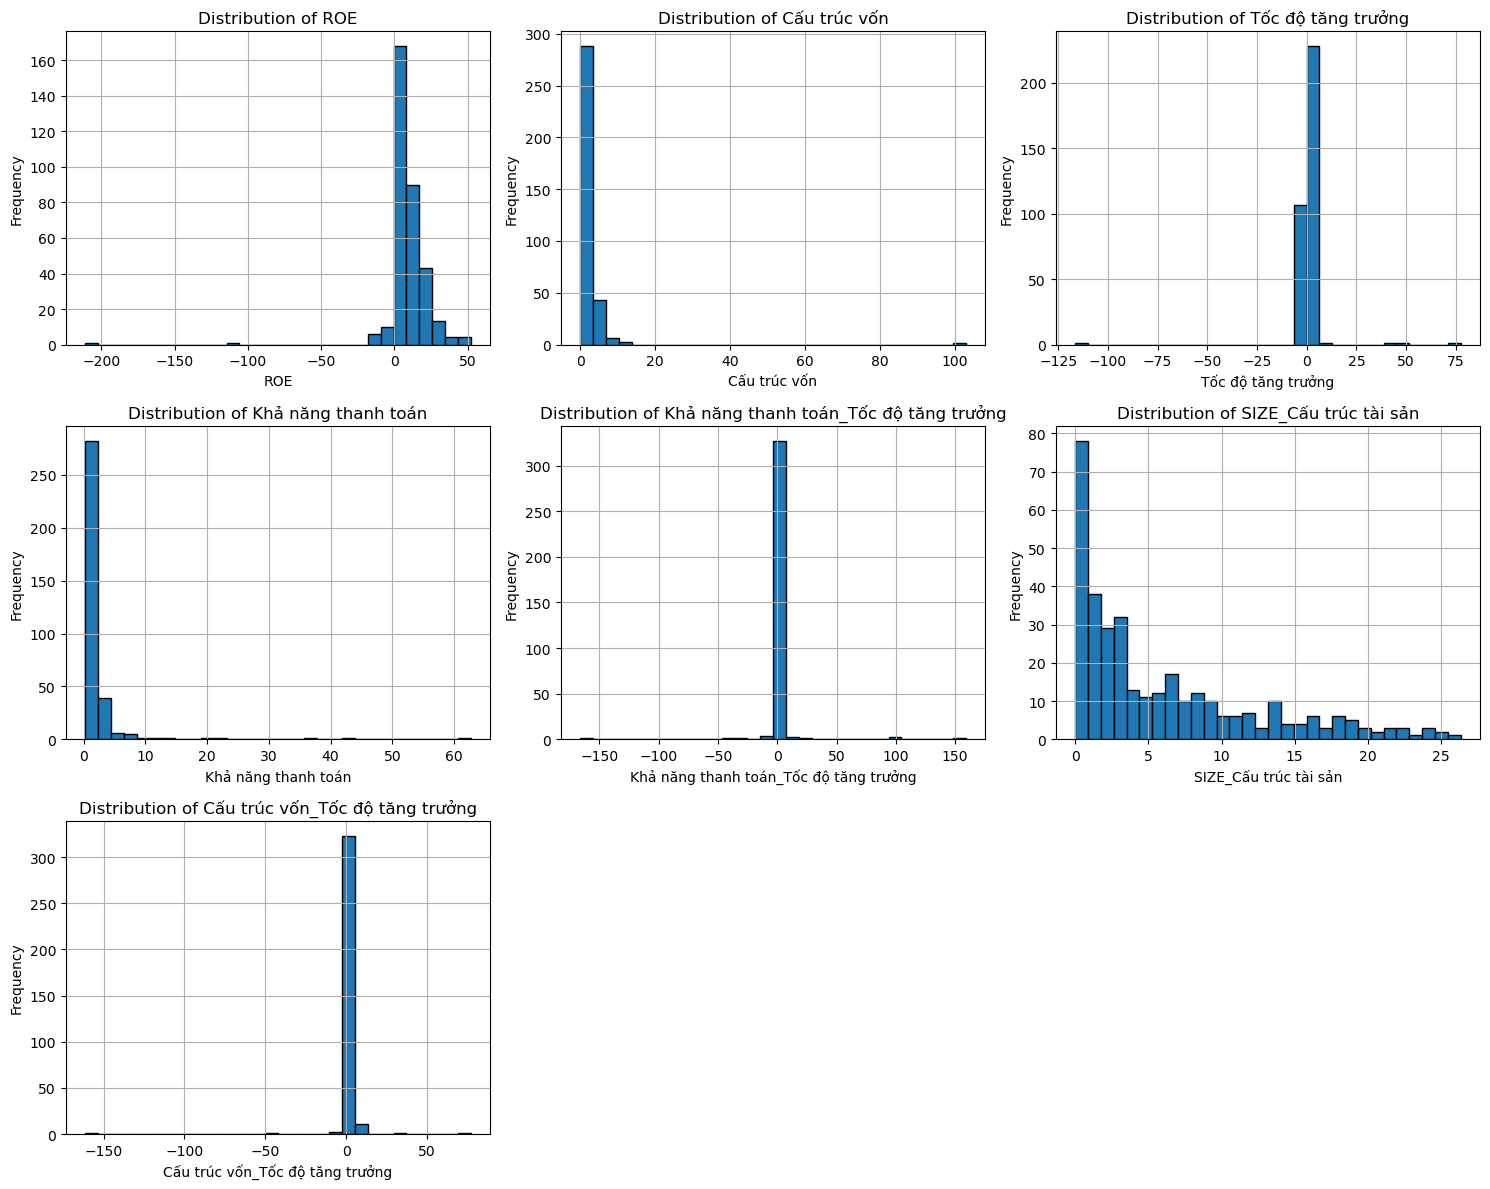

In [ ]:
import matplotlib.pyplot as plt

# Các cột cần vẽ biểu đồ
columns_to_plot = ['ROE', 'Cấu trúc vốn', 'Tốc độ tăng trưởng',
                   'Khả năng thanh toán', 'Khả năng thanh toán_Tốc độ tăng trưởng',
                   'SIZE_Cấu trúc tài sản', 'Cấu trúc vốn_Tốc độ tăng trưởng']

# Số lượng cột và dòng trong subplot
num_cols = 3
num_rows = (len(columns_to_plot) - 1) // num_cols + 1  # tính toán số dòng cần thiết

# Tạo subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Vẽ từng biểu đồ histogram cho mỗi cột
for i, column in enumerate(columns_to_plot):
    ax = axes[i // num_cols, i % num_cols]  # Chọn đúng vị trí subplot
    ax.hist(result_df_filtered[column], bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Xóa các subplot trống nếu có
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Tự động điều chỉnh khoảng cách giữa các subplot
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_11996\1912858595.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Năm', y=column, data=result_df_filtered, ax=ax, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_11996\1912858595.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Năm', y=column, data=result_df_filtered, ax=ax, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_11996\1912858595.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Năm', y=column, data=result_df_filtered, ax=ax, palette='viridis')
C:\U

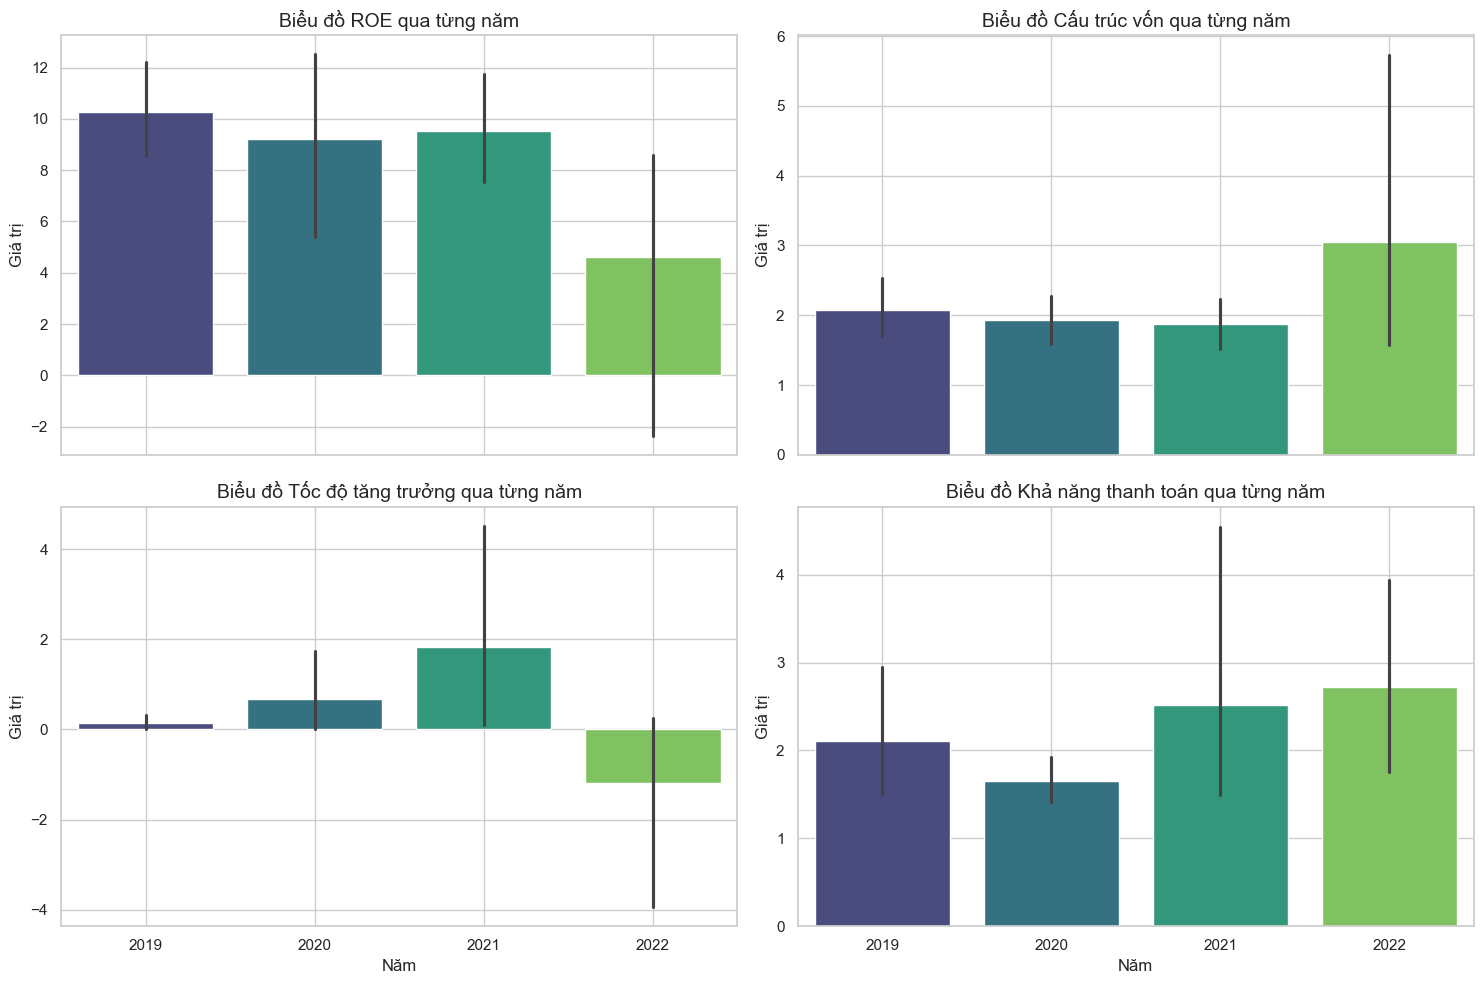

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử result_df_filtered là DataFrame chứa dữ liệu đã được lọc
# result_df_filtered = pd.read_csv('path_to_your_data.csv')

# Đảm bảo các cột cần thiết có trong DataFrame
columns_to_plot = ['ROE', 'Cấu trúc vốn', 'Tốc độ tăng trưởng', 'Khả năng thanh toán']

# Thiết lập chủ đề cho seaborn
sns.set_theme(style="whitegrid")

# Tạo các biểu đồ cột riêng biệt cho từng chỉ số
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

for ax, column in zip(axes.flatten(), columns_to_plot):
    sns.barplot(x='Năm', y=column, data=result_df_filtered, ax=ax, palette='viridis')
    ax.set_title(f'Biểu đồ {column} qua từng năm', fontsize=14)
    ax.set_xlabel('Năm', fontsize=12)
    ax.set_ylabel('Giá trị', fontsize=12)
    ax.grid(True)

plt.tight_layout()  # Đảm bảo rằng các biểu đồ không bị chồng lên nhau
plt.show()




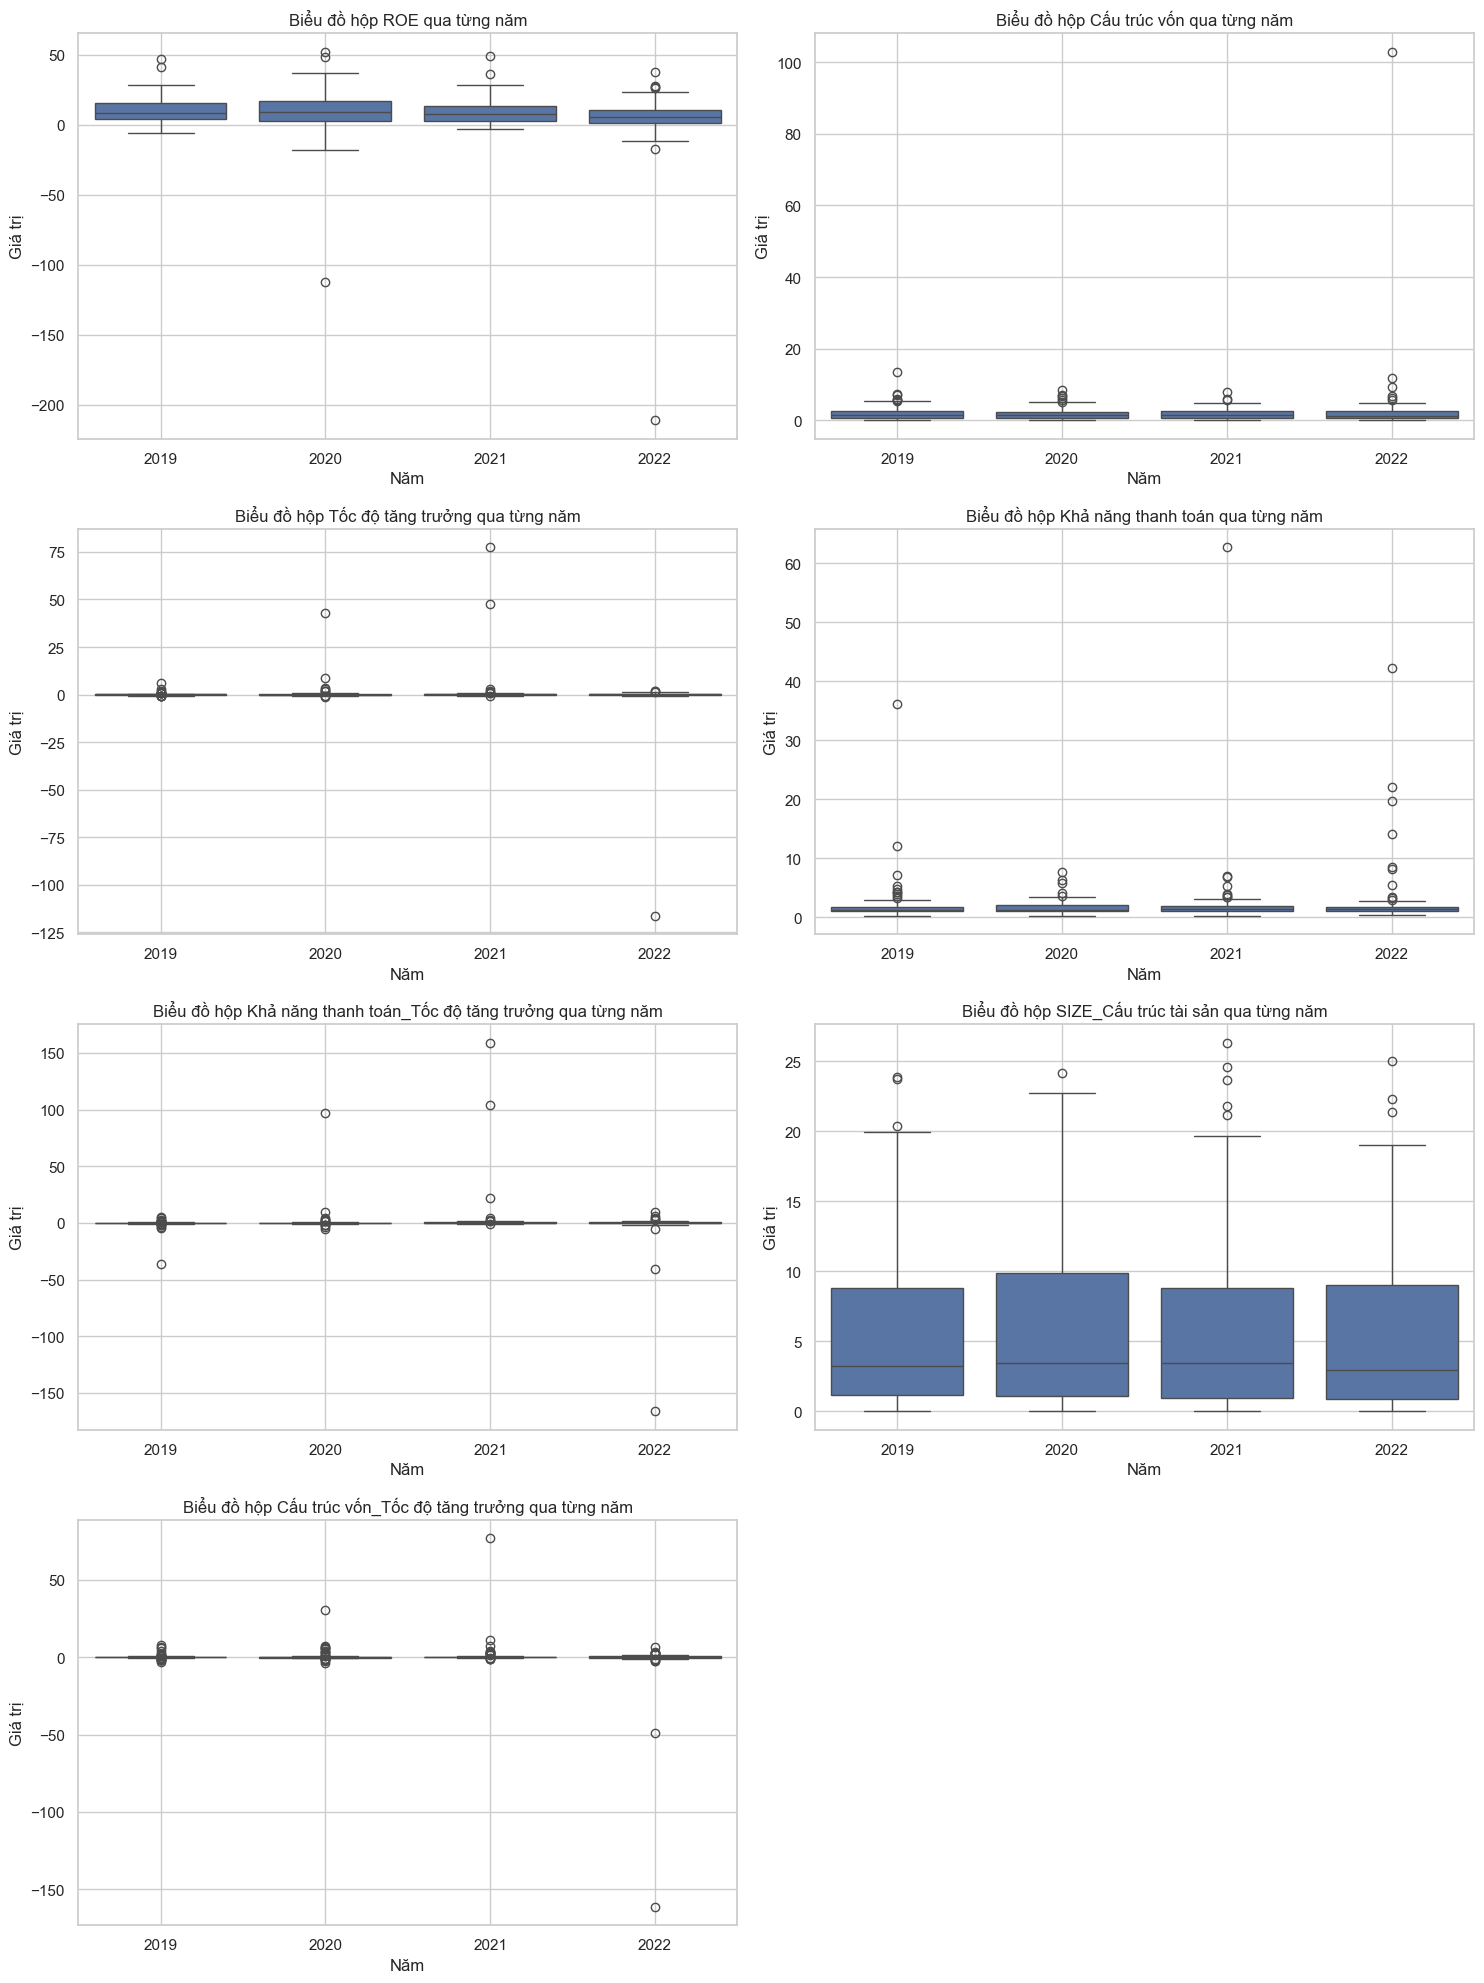

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử result_df_filtered là DataFrame chứa dữ liệu đã được lọc
# result_df_filtered = pd.read_csv('path_to_your_data.csv')

# Đảm bảo các cột cần thiết có trong DataFrame
columns_to_plot = ['ROE', 'Cấu trúc vốn', 'Tốc độ tăng trưởng',
                   'Khả năng thanh toán', 'Khả năng thanh toán_Tốc độ tăng trưởng',
                   'SIZE_Cấu trúc tài sản', 'Cấu trúc vốn_Tốc độ tăng trưởng']

# Thiết lập chủ đề cho seaborn
sns.set_theme(style="whitegrid")

# Tạo các biểu đồ hộp riêng biệt cho từng chỉ số
plt.figure(figsize=(15, 20))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='Năm', y=column, data=result_df_filtered)
    plt.title(f'Biểu đồ hộp {column} qua từng năm')
    plt.xlabel('Năm')
    plt.ylabel('Giá trị')
    plt.grid(True)

plt.tight_layout()
plt.show()


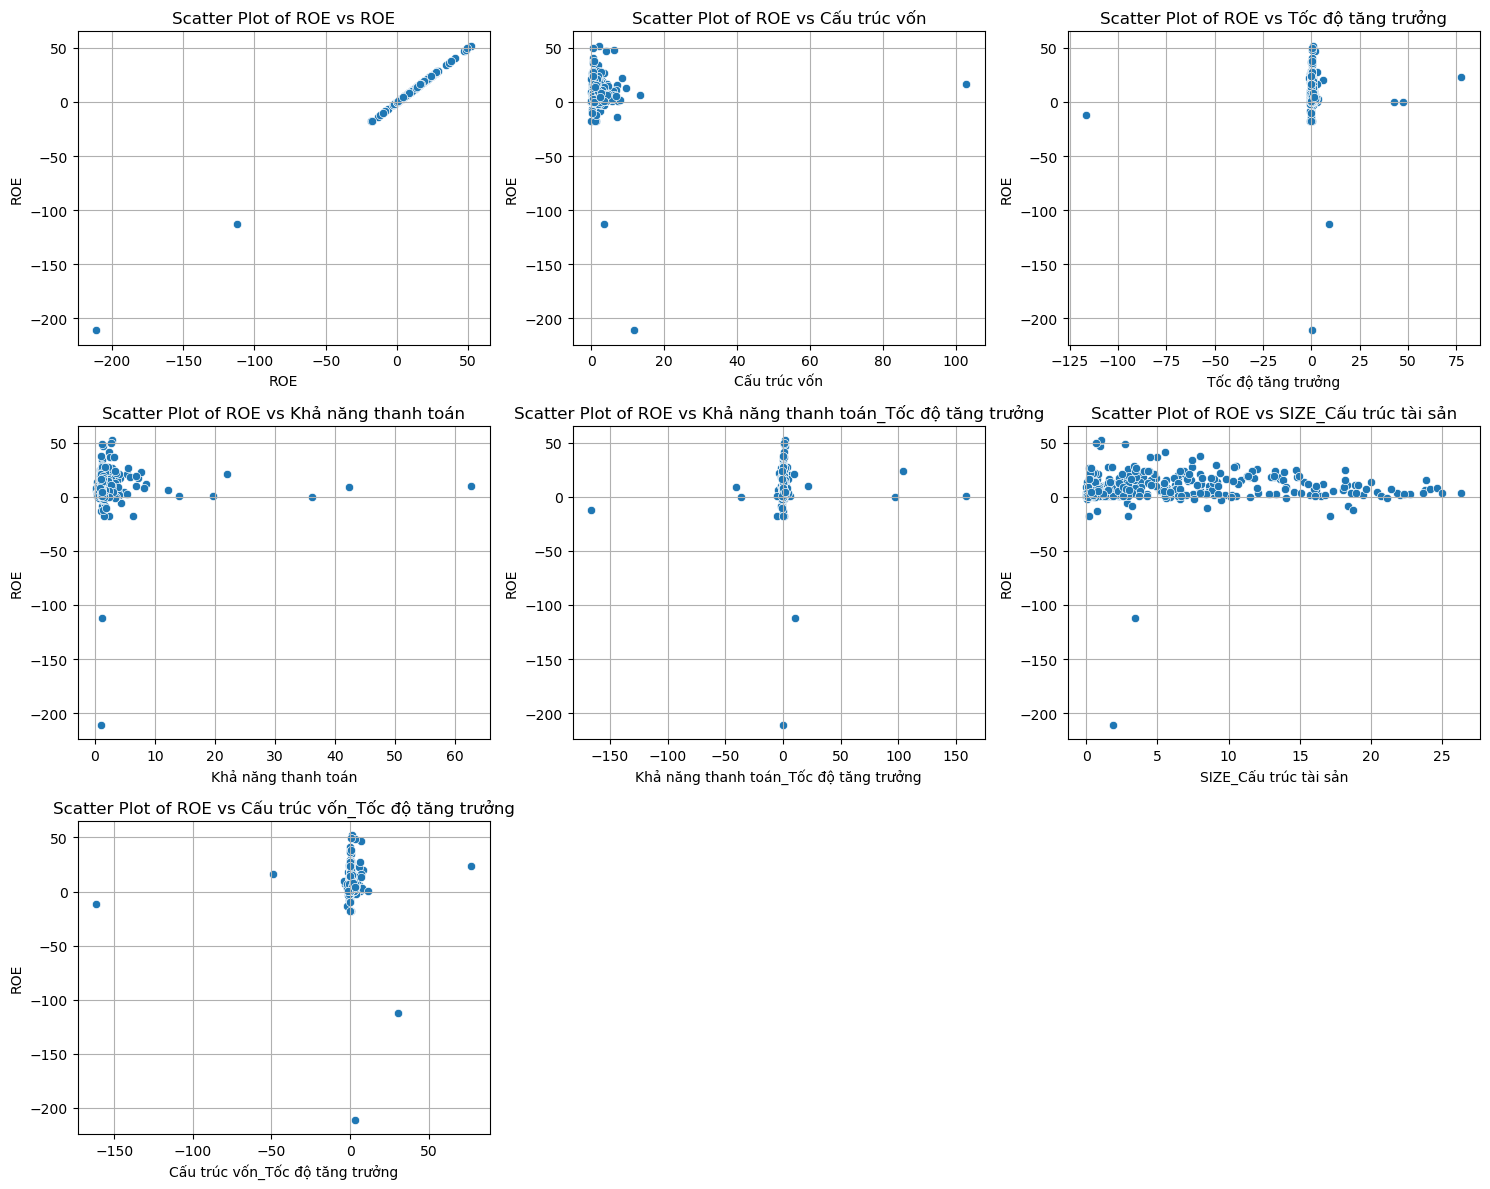

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử result_df_filtered đã có sẵn, ví dụ:
# result_df_filtered = pd.DataFrame(...)

# Các cột cần vẽ biểu đồ scatter
columns_to_plot = ['ROE', 'Cấu trúc vốn', 'Tốc độ tăng trưởng',
                   'Khả năng thanh toán', 'Khả năng thanh toán_Tốc độ tăng trưởng',
                   'SIZE_Cấu trúc tài sản', 'Cấu trúc vốn_Tốc độ tăng trưởng']

# Số lượng cột và dòng trong subplot
num_cols = 3
num_rows = (len(columns_to_plot) - 1) // num_cols + 1  # Tính toán số dòng cần thiết

# Tạo subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Vẽ từng biểu đồ scatter cho mỗi cặp cột
for i, column in enumerate(columns_to_plot):
    ax = axes[i // num_cols, i % num_cols]  # Chọn đúng vị trí subplot
    sns.scatterplot(data=result_df_filtered, x=column, y='ROE', ax=ax)
    ax.set_title(f'Scatter Plot of ROE vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('ROE')
    ax.grid(True)

# Xóa các subplot trống nếu có
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Tự động điều chỉnh khoảng cách giữa các subplot
fig.tight_layout()

# Hiển thị biểu đồ
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_4848\791661189.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Năm', y=column, data=result_df_filtered, ci=None,
C:\Users\HP\AppData\Local\Temp\ipykernel_4848\791661189.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Năm', y=column, data=result_df_filtered, ci=None,
C:\Users\HP\AppData\Local\Temp\ipykernel_4848\791661189.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Năm', y=column, data=result_df_filtered, ci=None,
C:\Users\HP\AppData\Local\Temp\ipykernel_4848\791661189.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Năm', y=column, data=result_df_filtered, ci=None,
C:\Users\HP\AppData\Local\Temp\ipykernel_4848\791661189.py:17: FutureWarning: 

The `ci` parameter is de

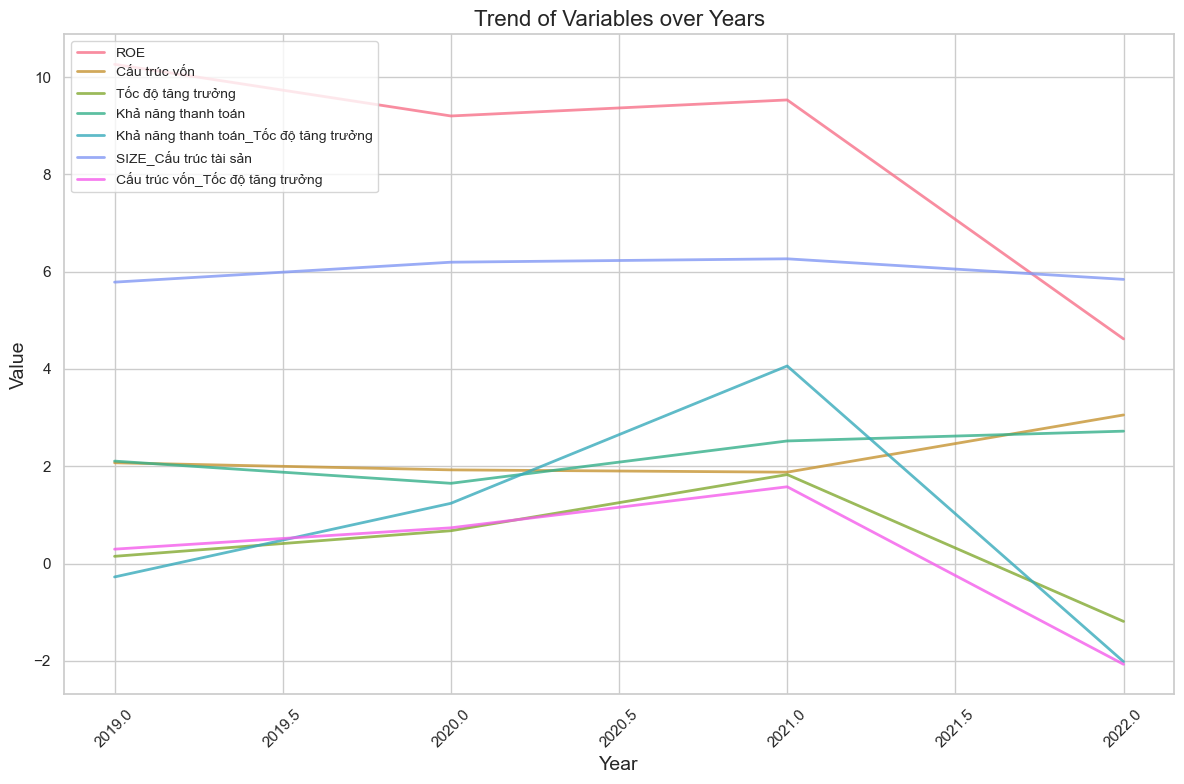

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Các cột cần vẽ biểu đồ
columns_to_plot = ['ROE', 'Cấu trúc vốn', 'Tốc độ tăng trưởng',
                   'Khả năng thanh toán', 'Khả năng thanh toán_Tốc độ tăng trưởng',
                   'SIZE_Cấu trúc tài sản', 'Cấu trúc vốn_Tốc độ tăng trưởng']

# Sử dụng seaborn để thiết lập giao diện
sns.set(style="whitegrid")

# Vẽ biểu đồ đường cho từng biến qua từng năm
plt.figure(figsize=(12, 8))
palette = sns.color_palette("husl", len(columns_to_plot))  # Tạo palette màu sắc đa dạng

for i, column in enumerate(columns_to_plot):
    sns.lineplot(x='Năm', y=column, data=result_df_filtered, ci=None,
                 label=column, linewidth=2, alpha=0.8, color=palette[i])

plt.title('Trend of Variables over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()




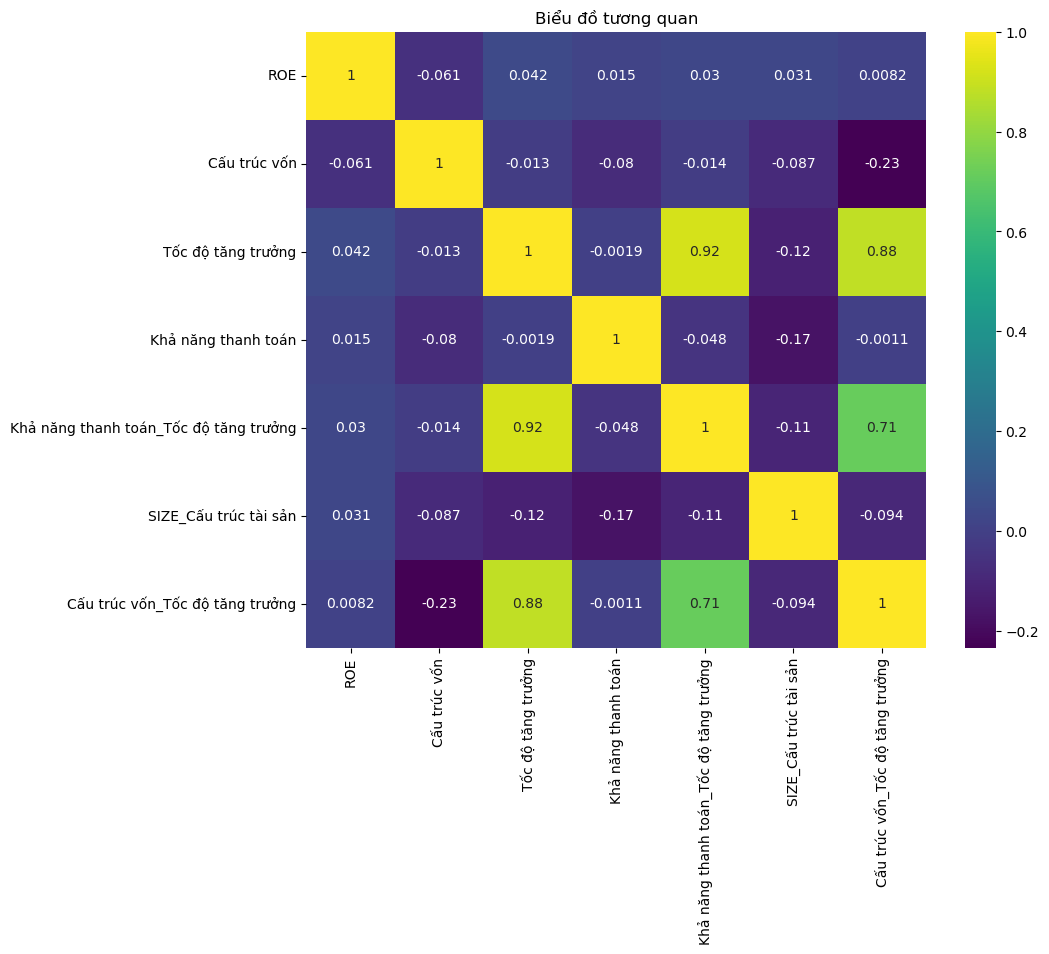

In [ ]:
# Correlation heatmap with different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(result_df_filtered[['ROE', 'Cấu trúc vốn', 'Tốc độ tăng trưởng', 'Khả năng thanh toán',
                               'Khả năng thanh toán_Tốc độ tăng trưởng' ,'SIZE_Cấu trúc tài sản', 'Cấu trúc vốn_Tốc độ tăng trưởng',
                               ]].corr(), annot=True, cmap='viridis')
plt.title('Biểu đồ tương quan')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Giả sử result_df_filtered đã được định nghĩa trước đó, ví dụ:
# result_df_filtered = pd.read_csv('your_data.csv')

# Kiểm tra nếu cột 'Năm' tồn tại trong DataFrame
if 'Năm' in result_df_filtered.columns:
    result_df_filtered = result_df_filtered.drop(columns=['Năm'])

# Chuẩn hóa dữ liệu (loại trừ cột 'ROE' nếu nó là biến mục tiêu)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(result_df_filtered)

# Áp dụng PCA
pca = PCA(n_components=2)  # Chọn số lượng thành phần chính muốn giữ lại
pca_data = pca.fit_transform(scaled_data)

# Tạo DataFrame mới từ dữ liệu PCA
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

# In ra các thành phần chính
print("Các thành phần chính:")
print(pca.components_)

Các thành phần chính:
[[-0.02589045  0.06740754  0.09484944 -0.49868201  0.15093368 -0.02531228
   0.09484944  0.06846156 -0.46106155 -0.49863513 -0.46472503  0.15105149]
 [-0.01128561 -0.0294916   0.48722101  0.11944845  0.45288866 -0.19747014
   0.48722101 -0.02249279  0.13547708  0.12079274  0.11012529  0.46934562]]


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Các thành phần chính mới
principal_components = np.array([
    [-0.02589045, 0.06740754, 0.09484944, -0.49868201, 0.15093368, -0.02531228, 0.09484944],
    [-0.01128561, -0.0294916, 0.48722101, 0.11944845, 0.45288866, -0.19747014, 0.48722101]
])

# Đảm bảo rằng dữ liệu đầu vào có cùng số cột với số hàng của ma trận thành phần chính
data = result_df_filtered[['Cấu trúc vốn', 'Quy mô hoạt động', 'Tốc độ tăng trưởng', 'Cấu trúc tài sản', 'Khả năng thanh toán', 'SIZE']].values

# Điều chỉnh ma trận các thành phần chính để có kích thước khớp với dữ liệu
# Ở đây ta chỉ lấy 6 hàng đầu tiên của ma trận principal_components để khớp với dữ liệu
principal_components_adjusted = principal_components[:, :6]

# Biến đổi dữ liệu thành không gian các thành phần chính
transformed_data = np.dot(data, principal_components_adjusted.T)

# Chọn một số thành phần chính quan trọng nhất (ví dụ: 2 thành phần chính đầu tiên)
important_components = transformed_data[:, :2]

# Thêm các biến tương tác vào dữ liệu
# Ví dụ: thêm các biến tương tác của 'Cấu trúc vốn' và 'Quy mô hoạt động'
interaction_features = data[:, 0] * data[:, 1]  # Cấu trúc vốn * Quy mô hoạt động

# Chúng ta có thể thêm các biến tương tác vào mảng của các thành phần chính
important_components_with_interaction = np.column_stack((important_components, interaction_features))

# Biến đổi dữ liệu thành không gian các thành phần chính với biến tương tác
X = important_components_with_interaction
y = result_df_filtered['ROE'].values

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán giá trị trên dữ liệu huấn luyện
y_pred = model.predict(X)

# Đánh giá mô hình
mse = mean_squared_error(y, y_pred)  # Mean Squared Error
r2 = r2_score(y, y_pred)  # R-squared (R2 score)

# Hiển thị kết quả đánh giá
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 score):", r2)

# Đánh giá mô hình bằng cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)


Mean Squared Error (MSE): 281.1981904533982
R-squared (R2 score): 0.009279162586924294
Cross-validation scores: [-9.95433147e-02 -1.75082346e-02 -3.47281147e-02 -5.91598326e-03
 -2.14904530e+01]


In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import uniform, randint

# Giả sử result_df_filtered đã được định nghĩa trước đó và bao gồm các cột được tính toán
data = result_df_filtered.drop(columns=['ROE'])


# Chuẩn bị dữ liệu cho mô hình
X = data.values
y = result_df_filtered['ROE']

# Khởi tạo mô hình XGBoost
xgb = XGBRegressor()

# Thiết lập lưới tham số để tìm kiếm
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 30),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 10)
}

# Thiết lập RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='r2', random_state=42)

# Thực hiện tìm kiếm ngẫu nhiên
random_search.fit(X, y)

# Lấy ra các tham số tốt nhất
best_params = random_search.best_params_

# Dự đoán giá trị trên dữ liệu huấn luyện
best_model = random_search.best_estimator_
y_pred = best_model.predict(X)

# Đánh giá mô hình
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Hiển thị kết quả đánh giá
print("Best parameters found: ", best_params)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'colsample_bytree': 0.9660041161894142, 'gamma': 0.13044681167085698, 'learning_rate': 0.014591362087115426, 'max_depth': 19, 'min_child_weight': 1, 'n_estimators': 118, 'subsample': 0.9051891308194423}
Mean Absolute Error (MAE): 2.763007764426307
Mean Squared Error (MSE): 50.06455663883584
R-squared (R²): 0.8236119535550077
